# [CV2018] Midterm

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

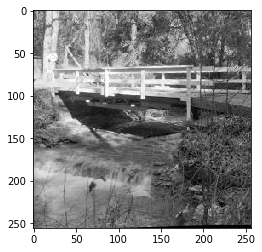

In [88]:
img = cv2.imread('img/bridge.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

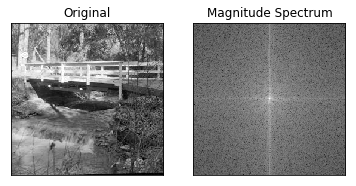

In [78]:
img = cv2.imread('img/bridge.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

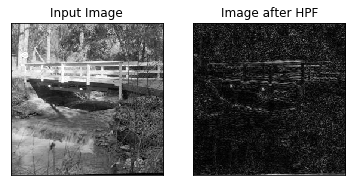

In [62]:
rows, cols = img.shape
crow, ccol = rows // 4 , cols // 4
fshift[:3*crow, 3 * ccol] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()

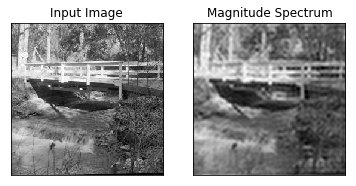

In [39]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### 1. Given a 256x256 image: (15%)

* (a) Perform the Fourier transform, keeping only 1/4 largest coefficients, and perform inverse transform to obtain image A.

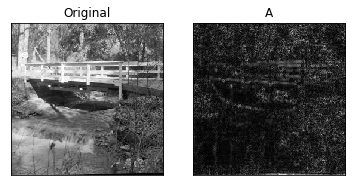

In [119]:
img = cv2.imread('img/bridge.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow, ccol = rows // 4 , cols // 4
fshift[:3*crow, :3*ccol] = 0
f_ishift = np.fft.ifftshift(fshift)
img_a = np.fft.ifft2(f_ishift)
img_a = np.abs(img_back)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_a, cmap = 'gray')
plt.title('A'), plt.xticks([]), plt.yticks([])
plt.show()

* (b) Divide the image into 256 16x16 blocks. Perform Fourier Transform on each block, keeping only 1/4 largest coefficients in each block, and take inverse transform to obtain image B.

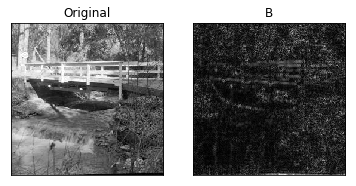

In [127]:
img = cv2.imread('img/bridge.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow, ccol = rows // 4 , cols // 4
fshift[:3*crow, :3*ccol] = 0
f_ishift = np.fft.ifftshift(fshift)
img_b = np.fft.ifft2(f_ishift)
img_b = np.abs(img_back)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_b, cmap = 'gray')
plt.title('B'), plt.xticks([]), plt.yticks([])
plt.show()

* (c) Reduce the size of the original image to 128x128 by sub-sampling or averaging. Perform Fourier Transform on the 128x128 image. Zero-pad the coefficient matrix to a 256x256 array. Then perform inverse transform to obtain image C.

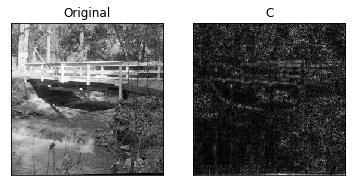

In [128]:
img = cv2.imread('img/bridge.jpg', 0)
img_128 = cv2.resize(img, dsize=(128, 128))
f = np.fft.fft2(img_128, [256, 256])
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow, ccol = rows // 256 , cols // 256
# fshift[:crow, :ccol] = 0
f_ishift = np.fft.ifftshift(fshift)
img_c = np.fft.ifft2(f_ishift)
img_c = np.abs(img_back)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_c, cmap = 'gray')
plt.title('C'), plt.xticks([]), plt.yticks([])
plt.show()

* Compute and compare the mean square error between (image, image A), (image, image B), and (image, image C): $ MSE(f, g) = \frac{1}{MN} \sum_{i=0}^{M-1} \sum_{j=0}^{N-1} (f(i,j)-g(i,j)) ^ 2 $

In [129]:
def mse(img0, img1):
    return np.square(np.subtract(img0, img1)).mean()
print('MSE(image, image A) = %f' % mse(img, img_a))
print('MSE(image, image B) = %f' % mse(img, img_b))
print('MSE(image, image C) = %f' % mse(img, img_c))

MSE(image, image A) = 14289.062137
MSE(image, image B) = 14289.062137
MSE(image, image C) = 14289.062137


### 2. Implement the adaptive medium filter and test with Figure 5.14 (a). (10%)

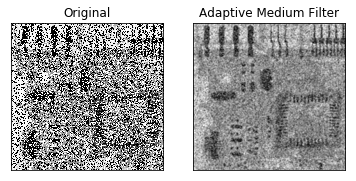

In [134]:
img = cv2.imread('img/figure5.14a.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Adaptive Medium Filter')
plt.xticks([]), plt.yticks([])
plt.show()

### 3. Use the transfer function of a Butterworth high pass filter of order n to construct a homomorphic filter. Your filter must exhibit the characteristic shape shown below and must include the parameters shown in the figure. (5%)

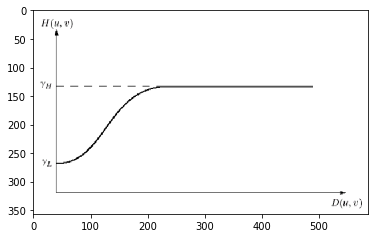

In [47]:
img = cv2.imread('img/figure4.32.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### 4. During acquisition, an image undergoes uniform linear motion in the vertical direction for a time interval T1. The direction of motion then switches to the horizontal direction for a time interval T2. Assuming that the time it takes for the camera to change direction is negligible, and the shutter opening closing times are also negligible, derive the expression for the blurring function H(u,v). (10%)

### 5. Find the the Fourier transform of the following equation where $ r^2 = x^2 + y^2 $. (5%)

$ h(r) = \frac{(r^2 - \sigma^2)}{\sigma^4} e^{-\frac{r^2}{2\sigma^2}} $